In [ ]:
# Define developmental stages as a list of strings
developmental_stages = ['embryo', 'L1', 'L2', 'L3', 'L4', 'adult']

# Optionally, assign numerical indices for convenience
time_points = list(range(len(developmental_stages)))

print("Developmental stages:", developmental_stages)
print("Numeric time points:", time_points)


Developmental stages: ['embryo', 'L1', 'L2', 'L3', 'L4', 'adult']
Numeric time points: [0, 1, 2, 3, 4, 5]


In [ ]:
import numpy as np

# Number of features (e.g., neuronal count, behavior, morphology)
num_features = 3

# Create dummy phenotype vectors for each developmental stage
# These are just example numbers for illustration
phenotype_fibers = np.array([
    [100, 0.2, 5],   # embryo
    [95, 0.3, 6],    # L1
    [90, 0.25, 7],   # L2
    [85, 0.4, 8],    # L3
    [80, 0.5, 8],    # L4
    [78, 0.6, 9]     # adult
])

print("Phenotype fibers shape:", phenotype_fibers.shape)
print("Phenotype fibers data:\n", phenotype_fibers)


Phenotype fibers shape: (6, 3)
Phenotype fibers data:
 [[100.     0.2    5.  ]
 [ 95.     0.3    6.  ]
 [ 90.     0.25   7.  ]
 [ 85.     0.4    8.  ]
 [ 80.     0.5    8.  ]
 [ 78.     0.6    9.  ]]


In [ ]:
# Define evolution rates per feature (multiplicative factors per step)
# <1 means decay, >1 means growth
evolution_rates = np.array([0.95, 1.05, 1.10])  # feature1 decays, features 2 and 3 grow

def evolve_phenotype(P_current):
    """
    Evolve the phenotype vector P_current to next time step.
    """
    return P_current * evolution_rates


In [ ]:
def simulate_normal_development(P0, num_steps):
    """
    Simulate phenotype evolution for num_steps starting from initial vector P0.
    Returns array of phenotype vectors at each time point.
    """
    phenotypes = [P0]
    P_current = P0
    for _ in range(num_steps - 1):
        P_next = evolve_phenotype(P_current)
        phenotypes.append(P_next)
        P_current = P_next
    return np.array(phenotypes)

# Initial phenotype vector (from embryo stage)
P0 = phenotype_fibers[0]

# Simulate normal development across all stages
normal_trajectory = simulate_normal_development(P0, len(developmental_stages))

print("Simulated normal phenotype trajectory:\n", normal_trajectory)


In [ ]:
""" Evolution rate is LT on fiber, (family of) linear operator implementing parallel transport of fiber
U: The finite transformation induced by integrating the connection along a small step in the base. So
U is the finite linear operator implementing parallel transport of fiber vectors."""

Normal phenotype trajectory shape: (6, 3)


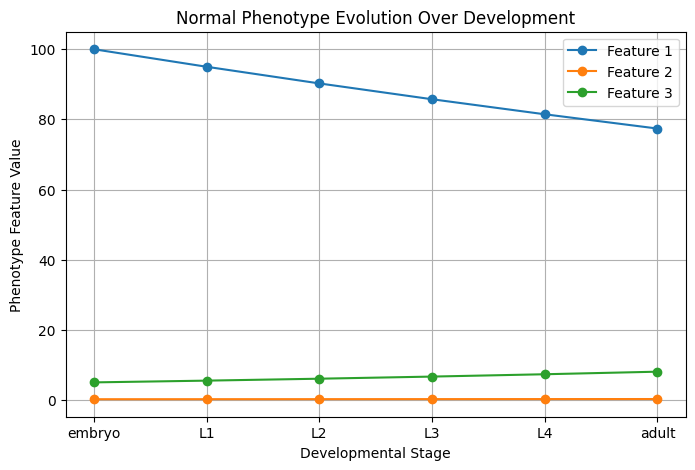

In [ ]:
# Make sure these are defined:
import numpy as np

# Use your initial phenotype vector, for example from earlier:
P0 = phenotype_fibers[0]  # initial phenotype at embryo stage

# Evolution rates per feature (growth/decay factors)
evolution_rates = np.array([0.95, 1.05, 1.10])  # adjust as you want

def evolve_phenotype(P_current):
    return P_current * evolution_rates

def simulate_normal_development(P0, num_steps):
    phenotypes = [P0]
    P_current = P0
    for _ in range(num_steps - 1):
        P_next = evolve_phenotype(P_current)
        phenotypes.append(P_next)
        P_current = P_next
    return np.array(phenotypes)

# Run the simulation for all developmental stages
normal_trajectory = simulate_normal_development(P0, len(developmental_stages))

print("Normal phenotype trajectory shape:", normal_trajectory.shape)

import matplotlib.pyplot as plt
import numpy as np

# normal_trajectory is a numpy array of shape (num_stages, num_features)
# developmental_stages is a list of stage names like ['embryo', 'L1', ..., 'adult']

num_features = normal_trajectory.shape[1]
x = np.arange(len(developmental_stages))  # numeric x-axis for plotting

plt.figure(figsize=(8,5))

for i in range(num_features):
    plt.plot(x, normal_trajectory[:, i], marker='o', label=f'Feature {i+1}')

plt.xticks(ticks=x, labels=developmental_stages)  # set categorical labels
plt.xlabel('Developmental Stage')
plt.ylabel('Phenotype Feature Value')
plt.title('Normal Phenotype Evolution Over Development')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
"Deeper then phenotype vector or evolution matrix, define lie algebra generator for connection"

In [ ]:
import numpy as np
from scipy.linalg import expm

# Define a 3x3 Lie algebra element (twist matrix)
# This is your "spiral twist" in the fiber
A = np.array([
    [0.0, -0.3, 0.0],
    [0.3,  0.0, -0.1],
    [0.0,  0.1, 0.0]
])


In [ ]:
def evolve_spiral(P_current, A, dt=1.0):
    """
    Apply spiral evolution using matrix exponential of A.
    """
    U = expm(dt * A)  # connection-induced transformation
    return U @ P_current  # matrix multiply


In [ ]:
def simulate_spiral_development(P0, A, num_steps, dt=1.0):
    P_current = P0
    phenotypes = [P_current]
    for _ in range(num_steps - 1):
        P_next = evolve_spiral(P_current, A, dt)
        phenotypes.append(P_next)
        P_current = P_next
    return np.array(phenotypes)

spiral_trajectory = simulate_spiral_development(P0, A, len(developmental_stages))


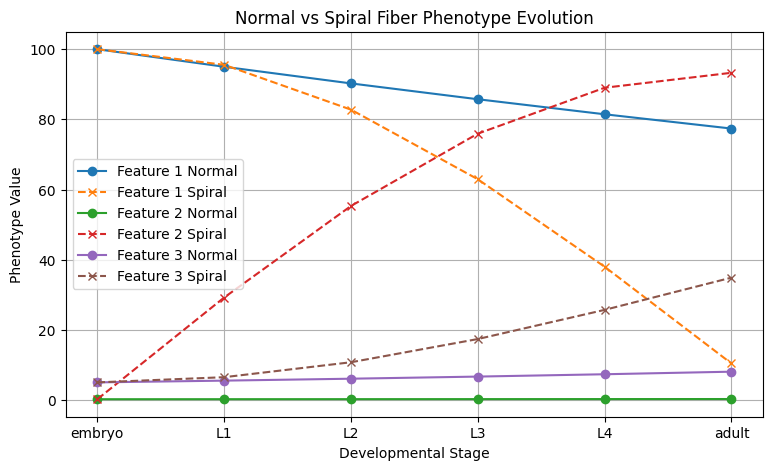

In [ ]:
x = np.arange(len(developmental_stages))

plt.figure(figsize=(9,5))
for i in range(spiral_trajectory.shape[1]):
    plt.plot(x, normal_trajectory[:, i], 'o-', label=f'Feature {i+1} Normal')
    plt.plot(x, spiral_trajectory[:, i], 'x--', label=f'Feature {i+1} Spiral')

plt.xticks(ticks=x, labels=developmental_stages)
plt.xlabel('Developmental Stage')
plt.ylabel('Phenotype Value')
plt.title('Normal vs Spiral Fiber Phenotype Evolution')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def get_generator_matrix(t_normalized):
    """
    Return a generator matrix A(t) depending on normalized time (0 to 1).
    You can think of this as the 'twist field' varying across development.
    """
    # Sinusoidal twist that changes over time
    omega = 0.5 * np.sin(2 * np.pi * t_normalized)  # goes from 0 → up → 0 → down → 0

    A_t = np.array([
        [0.0, -omega,  0.0],
        [omega, 0.0,  -0.1 * t_normalized],  # increasing downward coupling
        [0.0,  0.1 * t_normalized,  0.0]
    ])

    return A_t


In [ ]:
from scipy.linalg import expm

def simulate_curved_spiral_development(P0, num_steps, dt=1.0):
    """
    Simulate phenotype evolution using a time-varying generator A(t)
    to model a curved connection.
    """
    phenotypes = [P0]
    P_current = P0

    for i in range(num_steps - 1):
        t_normalized = i / (num_steps - 1)  # normalize to [0,1]
        A_t = get_generator_matrix(t_normalized)
        U = expm(dt * A_t)  # holonomy at this step
        P_next = U @ P_current
        phenotypes.append(P_next)
        P_current = P_next

    return np.array(phenotypes)

# Run the simulation
curved_spiral_trajectory = simulate_curved_spiral_development(P0, len(developmental_stages))


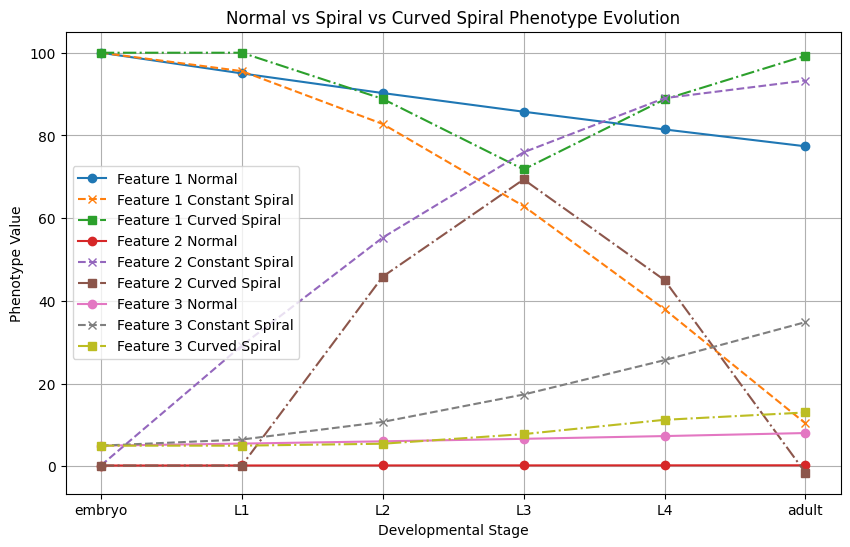

In [ ]:
x = np.arange(len(developmental_stages))

plt.figure(figsize=(10,6))
for i in range(curved_spiral_trajectory.shape[1]):
    plt.plot(x, normal_trajectory[:, i], 'o-', label=f'Feature {i+1} Normal')
    plt.plot(x, spiral_trajectory[:, i], 'x--', label=f'Feature {i+1} Constant Spiral')
    plt.plot(x, curved_spiral_trajectory[:, i], 's-.', label=f'Feature {i+1} Curved Spiral')

plt.xticks(ticks=x, labels=developmental_stages)
plt.xlabel('Developmental Stage')
plt.ylabel('Phenotype Value')
plt.title('Normal vs Spiral vs Curved Spiral Phenotype Evolution')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
'3Parallel transport of P vectors 3diffconnections-evolution rule from linear, spiral, then curved spiral'

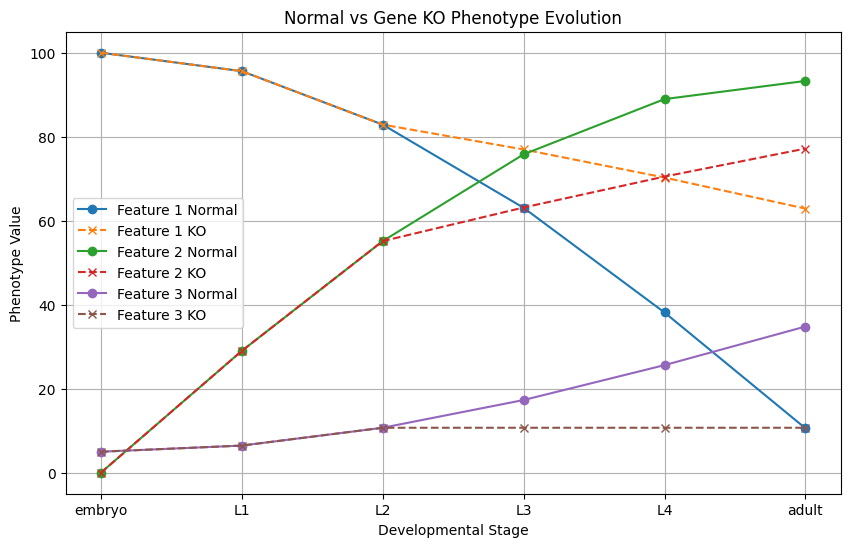

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Define the base space: developmental stages
developmental_stages = ['embryo', 'L1', 'L2', 'L3', 'L4', 'adult']
num_steps = len(developmental_stages)

# Define the initial phenotype vector (same for both normal and KO)
P0 = np.array([100.0, 0.0, 5.0])

# Normal development: fixed generator
def simulate_normal_development(P0, num_steps, dt=1.0):
    phenotypes = [P0]
    P_current = P0

    A_normal = np.array([
        [0.0, -0.3, 0.0],
        [0.3, 0.0, -0.1],
        [0.0, 0.1, 0.0]
    ])

    for _ in range(num_steps - 1):
        U = expm(dt * A_normal)
        P_next = U @ P_current
        phenotypes.append(P_next)
        P_current = P_next

    return np.array(phenotypes)

# KO development: generator changes at KO_step
def simulate_KO_development(P0, num_steps, KO_step, dt=1.0):
    phenotypes = [P0]
    P_current = P0

    A_normal = np.array([
        [0.0, -0.3, 0.0],
        [0.3, 0.0, -0.1],
        [0.0, 0.1, 0.0]
    ])

    A_KO = np.array([
        [0.0, -0.1, 0.0],
        [0.1, 0.0, 0.0],
        [0.0, 0.0, 0.0]
    ])

    for i in range(num_steps - 1):
        A_t = A_normal if i < KO_step else A_KO
        U = expm(dt * A_t)
        P_next = U @ P_current
        phenotypes.append(P_next)
        P_current = P_next

    return np.array(phenotypes)

# Simulate both
KO_step = 2  # KO happens after L2
normal_trajectory = simulate_normal_development(P0, num_steps)
KO_trajectory = simulate_KO_development(P0, num_steps, KO_step)

# Plot results
x = np.arange(num_steps)
plt.figure(figsize=(10, 6))

for i in range(3):
    plt.plot(x, normal_trajectory[:, i], 'o-', label=f'Feature {i+1} Normal')
    plt.plot(x, KO_trajectory[:, i], 'x--', label=f'Feature {i+1} KO')

plt.xticks(ticks=x, labels=developmental_stages)
plt.xlabel('Developmental Stage')
plt.ylabel('Phenotype Value')
plt.title('Normal vs Gene KO Phenotype Evolution')
plt.legend()
plt.grid(True)
plt.show()


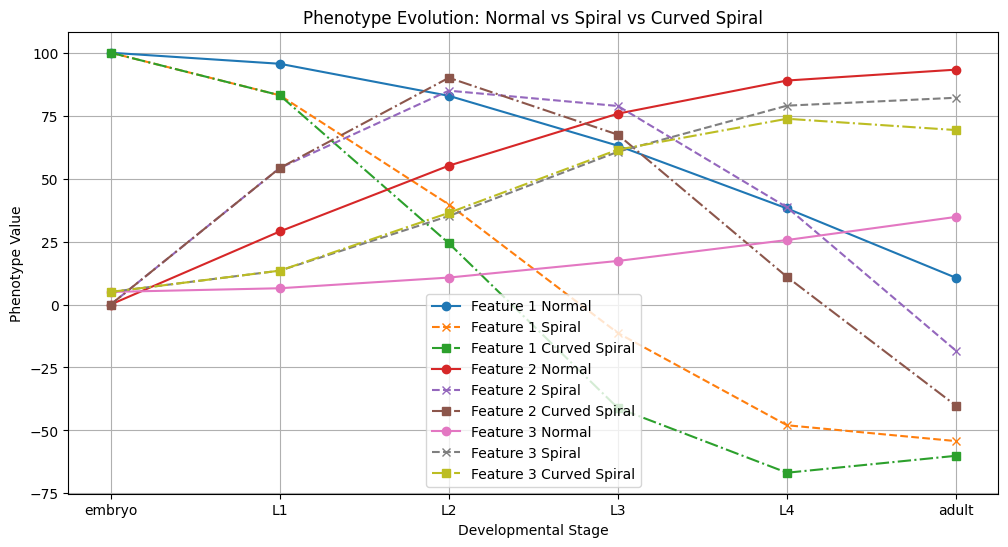

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# === Step 1: Setup ===

developmental_stages = ['embryo', 'L1', 'L2', 'L3', 'L4', 'adult']
num_steps = len(developmental_stages)
dt = 1.0
P0 = np.array([100.0, 0.0, 5.0])  # same starting point for all 3

# === Step 2: Generator definitions ===

# Normal = flat evolution (small, fixed rotation)
A_normal = np.array([
    [0.0, -0.3, 0.0],
    [0.3,  0.0, -0.1],
    [0.0,  0.1, 0.0]
])

# Spiral = larger consistent twist
A_spiral = np.array([
    [0.0, -0.6, 0.0],
    [0.6,  0.0, -0.3],
    [0.0,  0.3, 0.0]
])

# Curved spiral = time-varying twist → introduces curvature
def A_curved(t):
    angle = 0.6 + 0.2 * np.sin(t)  # generator strength varies over time
    return np.array([
        [0.0, -angle, 0.0],
        [angle, 0.0, -0.3],
        [0.0, 0.3, 0.0]
    ])

# === Step 3: Simulation functions ===

def simulate_development(P0, A, num_steps, dt=1.0):
    """For fixed generator A"""
    phenotypes = [P0]
    P_current = P0
    for _ in range(num_steps - 1):
        U = expm(dt * A)
        P_current = U @ P_current
        phenotypes.append(P_current)
    return np.array(phenotypes)

def simulate_curved_spiral(P0, num_steps, dt=1.0):
    """For time-varying generator A(t)"""
    phenotypes = [P0]
    P_current = P0
    for t in range(num_steps - 1):
        A_t = A_curved(t)
        U = expm(dt * A_t)
        P_current = U @ P_current
        phenotypes.append(P_current)
    return np.array(phenotypes)

# === Step 4: Run simulations ===

trajectory_normal = simulate_development(P0, A_normal, num_steps)
trajectory_spiral = simulate_development(P0, A_spiral, num_steps)
trajectory_curved = simulate_curved_spiral(P0, num_steps)

# === Step 5: Plot component-wise evolution ===

x = np.arange(num_steps)
plt.figure(figsize=(12, 6))

for i in range(3):
    plt.plot(x, trajectory_normal[:, i], 'o-', label=f'Feature {i+1} Normal')
    plt.plot(x, trajectory_spiral[:, i], 'x--', label=f'Feature {i+1} Spiral')
    plt.plot(x, trajectory_curved[:, i], 's-.', label=f'Feature {i+1} Curved Spiral')

plt.xticks(ticks=x, labels=developmental_stages)
plt.xlabel('Developmental Stage')
plt.ylabel('Phenotype Value')
plt.title('Phenotype Evolution: Normal vs Spiral vs Curved Spiral')
plt.legend()
plt.grid(True)
plt.show()


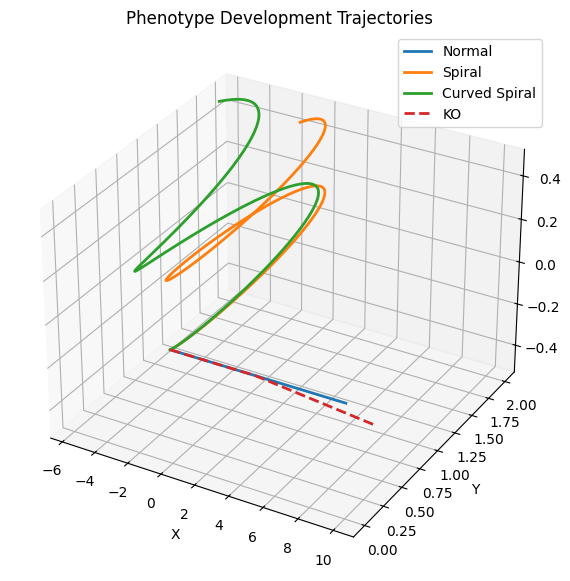

Distance between final Normal and KO endpoints: 2.793


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Simulate phenotype trajectories
def simulate_normal(P0, num_steps, dt=0.1):
    # Simple straight-line growth
    trajectory = [P0]
    for _ in range(num_steps):
        P_next = trajectory[-1] + np.array([dt, 0, 0])
        trajectory.append(P_next)
    return np.array(trajectory)

def simulate_spiral(P0, num_steps, dt=0.1):
    trajectory = [P0]
    angle = 0
    for _ in range(num_steps):
        angle += 0.1
        dx = dt * np.cos(angle)
        dy = dt * np.sin(angle)
        dz = dt * 0.05
        P_next = trajectory[-1] + np.array([dx, dy, dz])
        trajectory.append(P_next)
    return np.array(trajectory)

def simulate_curved_spiral(P0, num_steps, dt=0.1):
    trajectory = [P0]
    angle = 0
    curvature = 0.01
    for i in range(num_steps):
        angle += 0.1
        dx = dt * np.cos(angle) - curvature * i * dt
        dy = dt * np.sin(angle)
        dz = dt * 0.05
        P_next = trajectory[-1] + np.array([dx, dy, dz])
        trajectory.append(P_next)
    return np.array(trajectory)

def simulate_KO_development(P0, num_steps, KO_step, dt=0.1):
    # Before KO: normal development
    trajectory = [P0]
    for step in range(1, num_steps + 1):
        if step < KO_step:
            delta = np.array([dt, 0, 0])
        else:
            # KO effect: reduced growth and some drift in y,z
            delta = np.array([dt * 0.5, dt * 0.2, dt * -0.1])
        P_next = trajectory[-1] + delta
        trajectory.append(P_next)
    return np.array(trajectory)

# Initial point
P0 = np.array([0, 0, 0])
num_steps = 100
KO_step = 50

# Simulate each phenotype
normal_traj = simulate_normal(P0, num_steps)
spiral_traj = simulate_spiral(P0, num_steps)
curved_spiral_traj = simulate_curved_spiral(P0, num_steps)
KO_traj = simulate_KO_development(P0, num_steps, KO_step)

# Plotting all trajectories in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(normal_traj[:,0], normal_traj[:,1], normal_traj[:,2], label='Normal', linewidth=2)
ax.plot(spiral_traj[:,0], spiral_traj[:,1], spiral_traj[:,2], label='Spiral', linewidth=2)
ax.plot(curved_spiral_traj[:,0], curved_spiral_traj[:,1], curved_spiral_traj[:,2], label='Curved Spiral', linewidth=2)
ax.plot(KO_traj[:,0], KO_traj[:,1], KO_traj[:,2], label='KO', linewidth=2, linestyle='--')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Phenotype Development Trajectories')
ax.legend()

plt.show()

# Compute final endpoint distances for comparison (optional)
normal_final = normal_traj[-1]
KO_final = KO_traj[-1]
distance = np.linalg.norm(KO_final - normal_final)
print(f"Distance between final Normal and KO endpoints: {distance:.3f}")


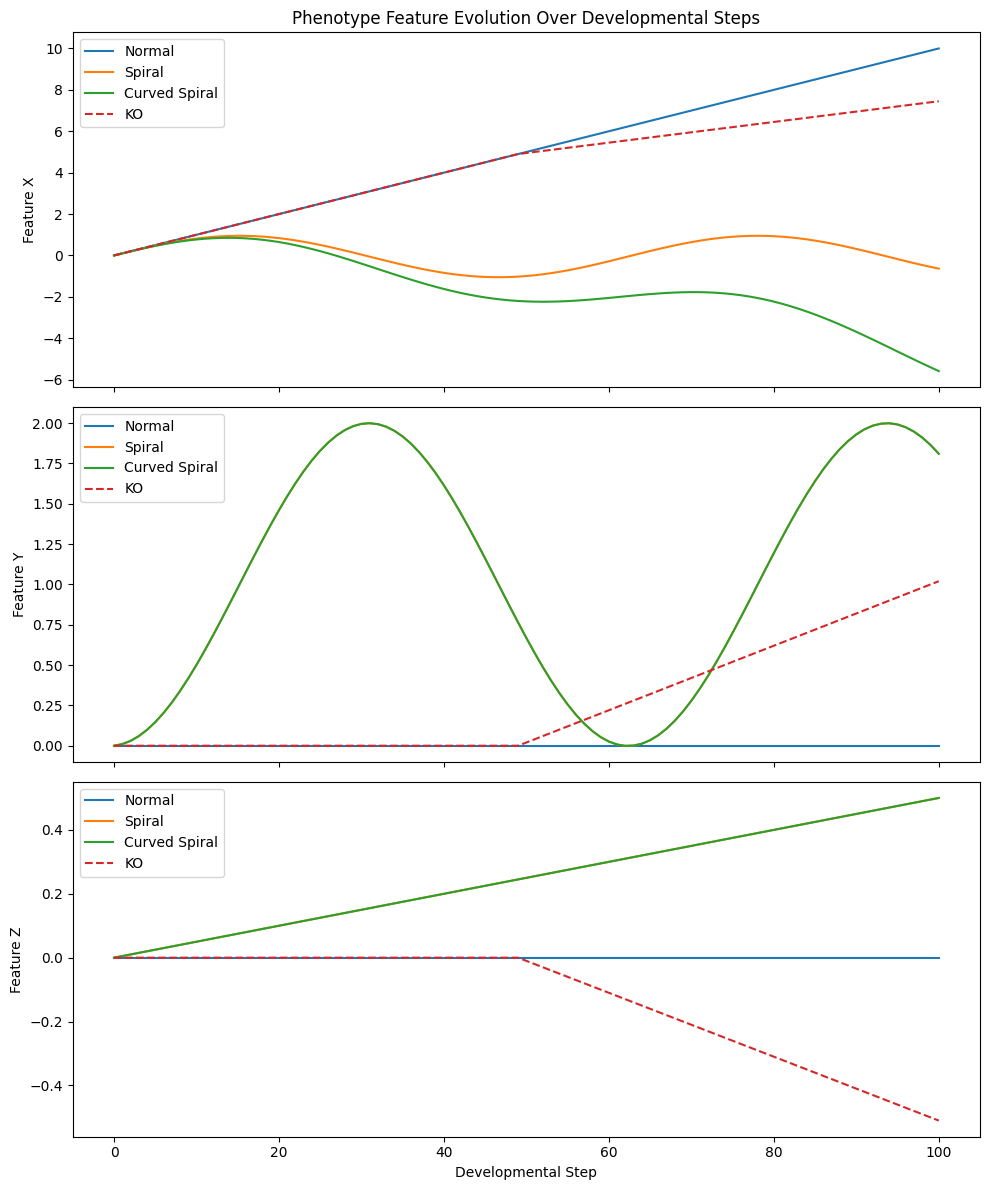

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# (Re-use the same simulation functions from before)
# ...

# Simulate trajectories (you can reuse your previous functions here)
normal_traj = simulate_normal(P0, num_steps)
spiral_traj = simulate_spiral(P0, num_steps)
curved_spiral_traj = simulate_curved_spiral(P0, num_steps)
KO_traj = simulate_KO_development(P0, num_steps, KO_step)

# Plot each coordinate over developmental steps
steps = np.arange(num_steps + 1)

fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# X coordinate over time
axs[0].plot(steps, normal_traj[:,0], label='Normal')
axs[0].plot(steps, spiral_traj[:,0], label='Spiral')
axs[0].plot(steps, curved_spiral_traj[:,0], label='Curved Spiral')
axs[0].plot(steps, KO_traj[:,0], label='KO', linestyle='--')
axs[0].set_ylabel('Feature X')
axs[0].legend()
axs[0].set_title('Phenotype Feature Evolution Over Developmental Steps')

# Y coordinate over time
axs[1].plot(steps, normal_traj[:,1], label='Normal')
axs[1].plot(steps, spiral_traj[:,1], label='Spiral')
axs[1].plot(steps, curved_spiral_traj[:,1], label='Curved Spiral')
axs[1].plot(steps, KO_traj[:,1], label='KO', linestyle='--')
axs[1].set_ylabel('Feature Y')
axs[1].legend()

# Z coordinate over time
axs[2].plot(steps, normal_traj[:,2], label='Normal')
axs[2].plot(steps, spiral_traj[:,2], label='Spiral')
axs[2].plot(steps, curved_spiral_traj[:,2], label='Curved Spiral')
axs[2].plot(steps, KO_traj[:,2], label='KO', linestyle='--')
axs[2].set_ylabel('Feature Z')
axs[2].set_xlabel('Developmental Step')
axs[2].legend()

plt.tight_layout()
plt.show()


In [ ]:
' geometric encoding of nonlinear developmental dynamics, curved is non abelian order matters'